In [1]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [3]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Dataset Features Description 
1. Age: Employee age
2. Attrition: if the employee leaves the job
3. BusinessTravel: The frequency of job travels
4. DailyRate: Billing cost for employee's services for a single day
5. Department: Employee work department
6. DistanceFromHome: Distance traveled to work from home
7. Education: Employee education level (1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor)
8. EducationField: Employee education field
9. EmployeeCount: Employee Count (Constant)
10. EmployeeNumber: Employee ID
11. EnvironmentSatisfaction: Numerical value for environment satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
12. Gender: Employee gender
13. HourlyRate: The amount of money that employee earns for every hour worked
14. JobInvolvement: Numerical value for job involvement (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
15. JobLevel: Numerical value for job level
16. JobRole: Employee job position
17. JobSatisfaction: Numerical value for job satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
18. MaritalStatus: Employee marital status
19. MonthlyIncome: The amount of money that employee earns in one month, before taxes or deductions
20. MonthlyRate: Billing cost for employee's services for a month
21. NumCompaniesWorked: Number of companies worked at
22. Over18: if employee is over 18 years old
23. OverTime: if employee works overtime
24. PercentSalaryHike: Percent increase in salary
25. PerformanceRating: Numerical value for performance rating (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding)
26. RelationshipSatisfaction: Numerical value for relationship satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
27. StandardHours: Hours employee spent working (Constant)
28. StockOptionsLevel: Numerical value for stock options
29. TotalWorkingYears: Total number of years employee worked
30. TrainingTimesLastYear: Hours employee spent on training last year
31. WorkLifeBalance: Numerical value for work life balance (1 = Bad, 2 = Good, 3 = Better, 4 = Best)
32. YearsAtCompany: Number of years employee worked at company
33. YearsInCurrentRole: Number of years employee worked as their current job role
34. YearsSinceLastPromotion: Number of years since last promotion
35. YearsWithCurrentManager: Number of years employee worked with current manager

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
cols = ["Over18","EmployeeCount","EmployeeNumber"]

df.drop(columns=cols, inplace=True)

In [8]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
count      1470.000000    1470.000000  ...               1470.000000   
mean          2.728571    6502.931293  ...                  2.712245   
std           1.102846    4707.956783  ...                  1.081209   
min           1.000000    1009.000000  ...                  1.000000   
25%           2.000000    2911.000000  ...                  2.000000   
50%           3.000000    4919.000000  ...                  3.000000   
75%           4.000000    8379.000000  ...                  4.000000   
max           4.000000   19999.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

# Note:
1. The minimum age requirement is set at 18, implying that all employees are adults. Consequently, the inclusion of an 'Over18' attribute is unnecessary for our analysis.
2. The standard deviation for both EmployeeCount and StandardHours is 0.00, indicating that all values within these attributes are identical.
3. The EmployeeNumber attribute uniquely identifies each employee but does not contribute any substantial insights to our analysis. Given that this attribute lacks meaningful insights for our analysis, we can safely omit it from our dataset.

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

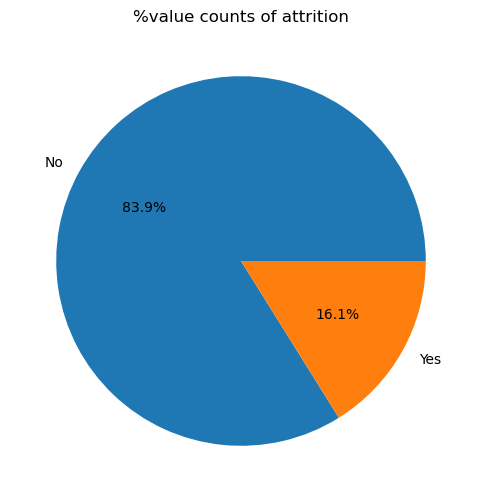

In [13]:
plt.figure(figsize=(6,6))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, labels=['No', 'Yes'], autopct='%1.1f%%');
plt.title("%value counts of attrition")
plt.show()

# Effect of BusinessTravel

<Axes: xlabel='BusinessTravel', ylabel='Percent'>

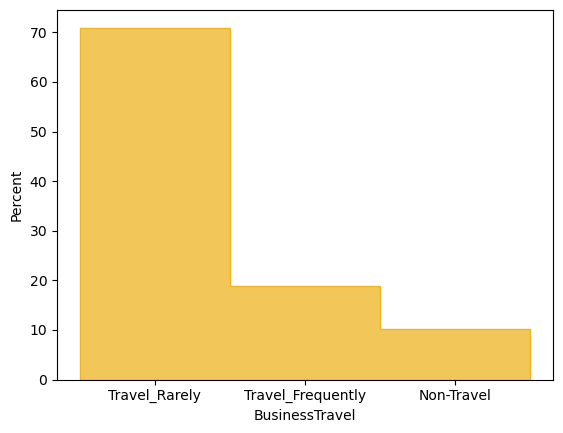

In [14]:

sns.histplot(data=df, x='BusinessTravel', element='step', color='#EEB422', stat='percent')

<Axes: xlabel='BusinessTravel', ylabel='count'>

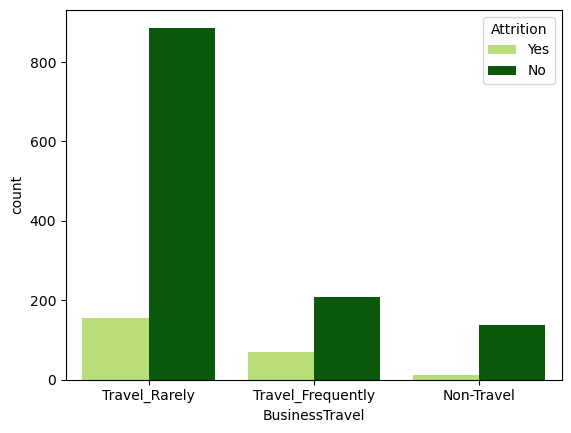

In [15]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=["#BCEE68","#006400"])


# Effect of "Distance from home" on attrition

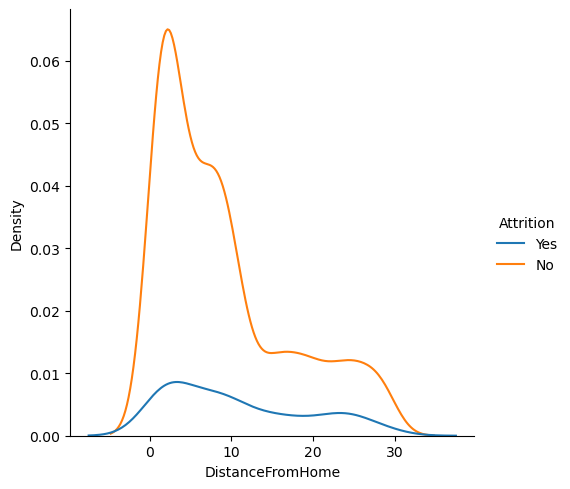

In [16]:
sns.displot(df, x="DistanceFromHome", hue="Attrition", kind="kde")

<Axes: xlabel='DistanceFromHome', ylabel='count'>

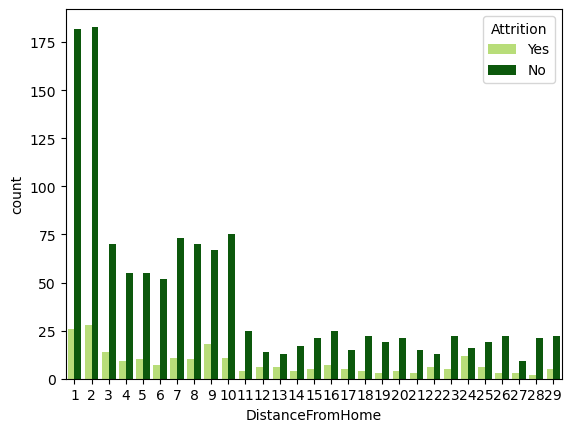

In [17]:
sns.countplot(x = 'DistanceFromHome', hue='Attrition', data=df, palette=["#BCEE68","#006400"])

<Axes: xlabel='Age', ylabel='DistanceFromHome'>

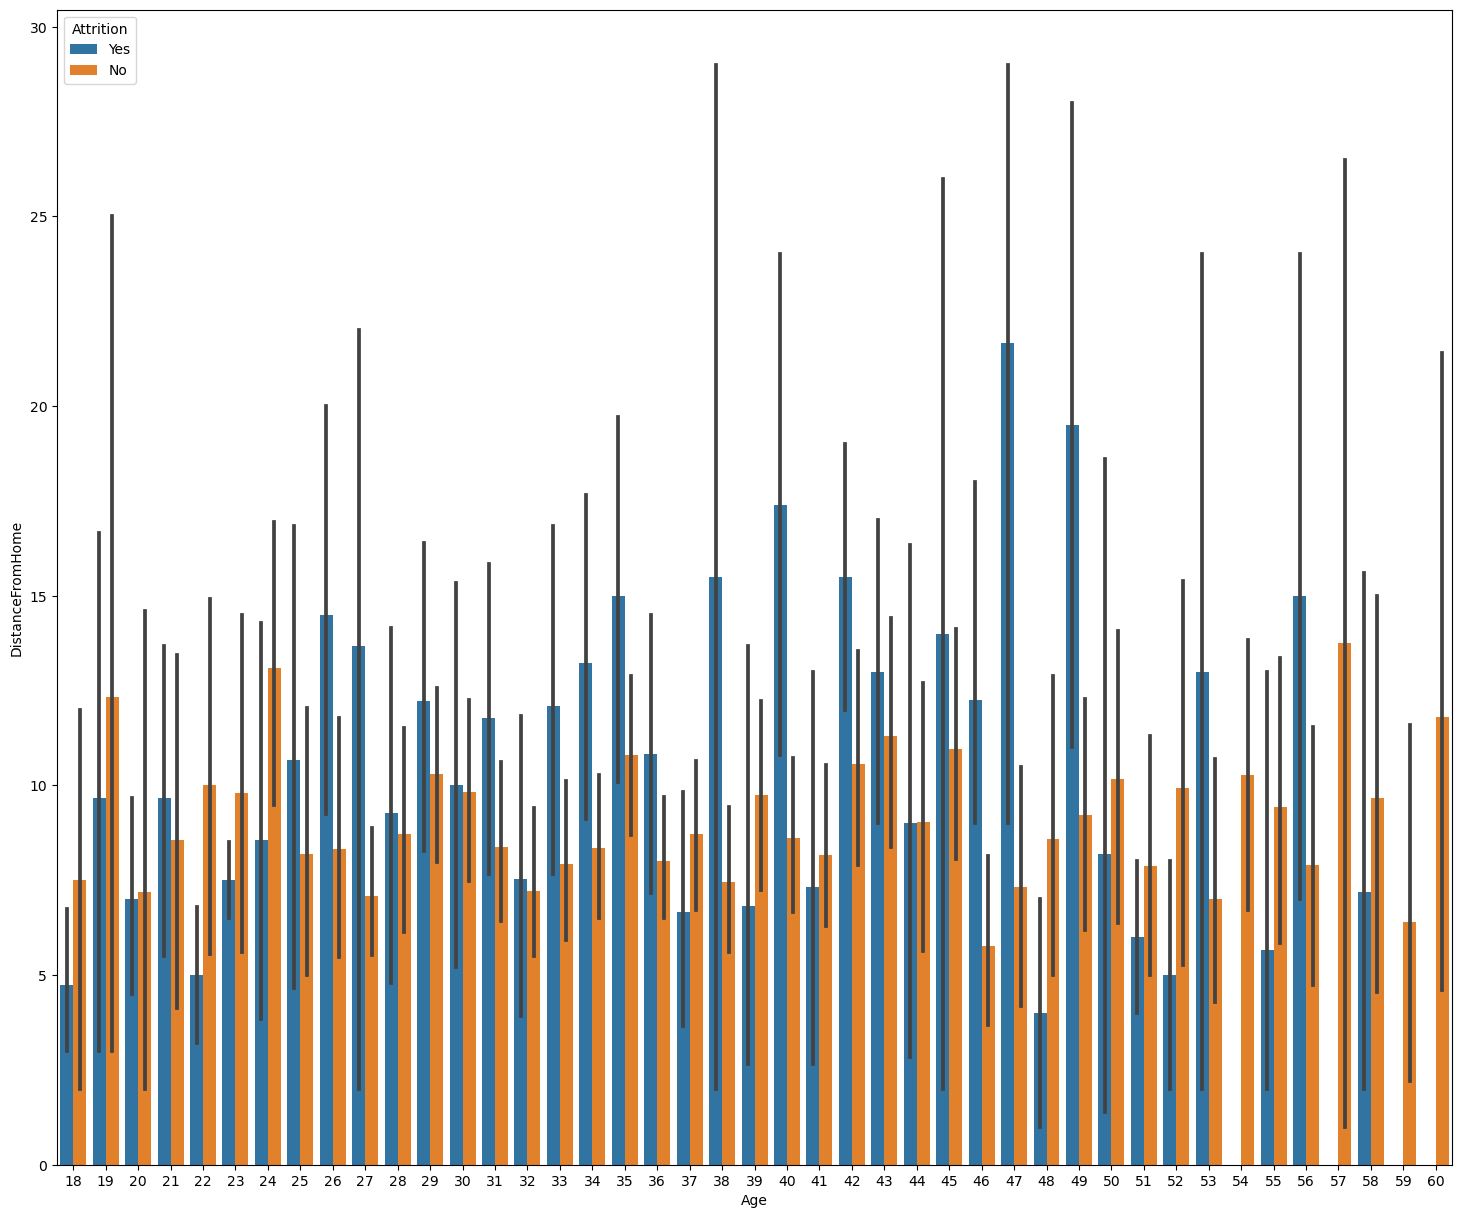

In [18]:
plt.figure(figsize=(18, 15))

# Create a bar plot with color differentiation based on 'Attrition'
sns.barplot(data=df, x='Age', y='DistanceFromHome', hue='Attrition')

# Effect of "Department of work" on attrition.


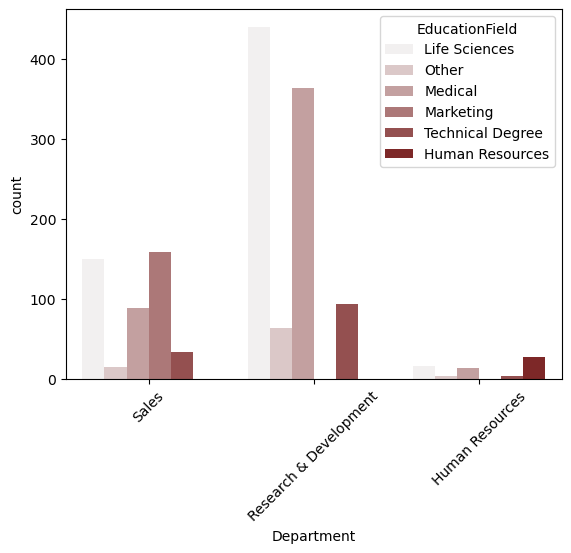

In [19]:
sns.countplot(df , x = 'Department',hue = 'EducationField' , color="#8B1A1A")
plt.xticks(rotation = 45);

# Effect of YearsWithCurrManager on attrition

<Axes: >

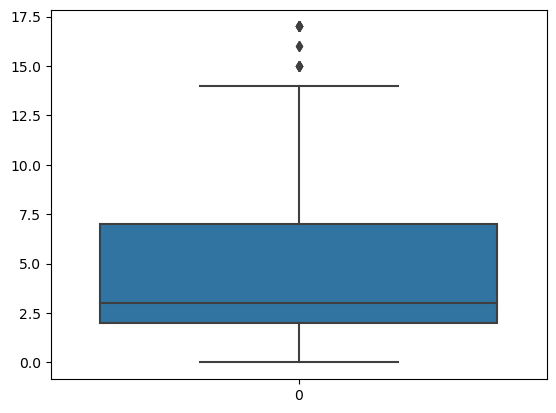

In [20]:
sns.boxplot(df["YearsWithCurrManager"])


In [21]:
import plotly.express as px
# Group and count by 'YearsWithCurrManager' and 'Attrition'
man_att = df.groupby(['YearsWithCurrManager', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# print(man_att)

# Create a line plot using Plotly Express
# plt.plot(man_att['YearsWithCurrManager'], man_att['Attrition'])
fig = px.line(man_att, x='YearsWithCurrManager', y='Counts', color='Attrition', 
              title='Count of People Spending Years with a Manager in an Organization')

# # Show the plot
fig.show()

# Which job role has the most attritions 

In [22]:
fig = px.histogram(data_frame = df, x = 'JobRole', color = 'Attrition',
                 width=1000, height=500, template="simple_white")

fig.update_layout(
    title={
        'text': "Job Role by Attrition",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# Effect of Income

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

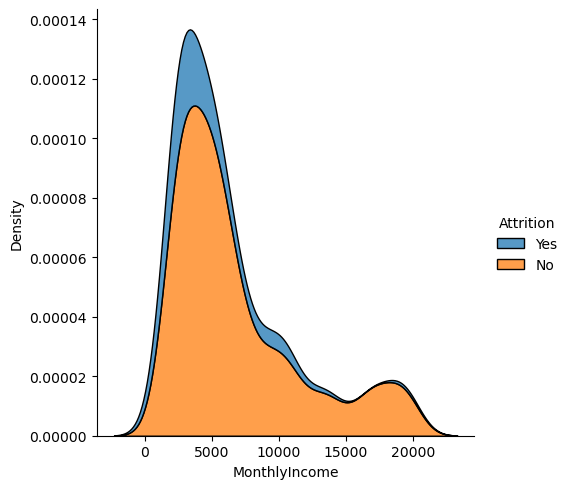

In [24]:
sns.displot(df, x="MonthlyIncome", hue="Attrition", kind="kde", multiple="stack")

In [25]:
s_df = pd.DataFrame(df.groupby('Department')[['PercentSalaryHike' , 'StandardHours']].sum())
s_df

PercentSalaryHike  StandardHours
Department                                              
Human Resources                       930           5040
Research & Development              14695          76880
Sales                                6733          35680

<Axes: xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

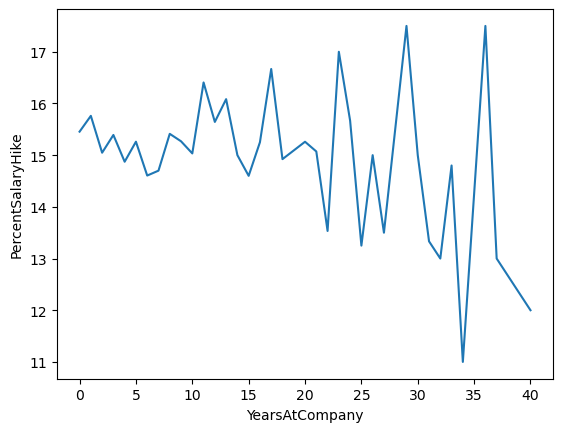

In [26]:
sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=df, errorbar=None)

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

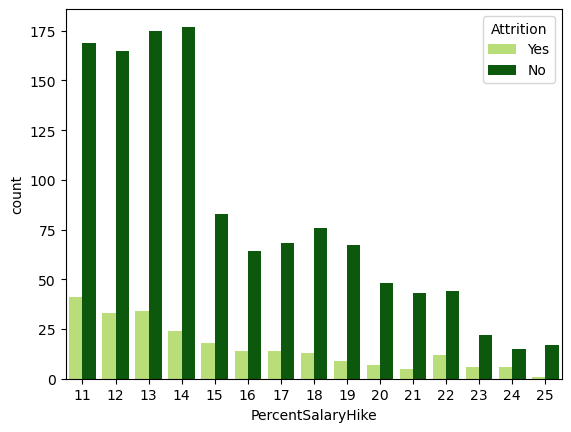

In [27]:
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df, palette=["#BCEE68","#006400"])

# Effect of Overtime

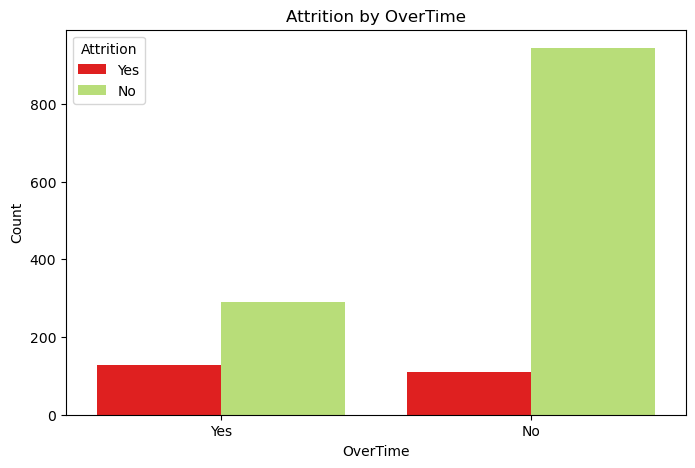

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette=['red', '#BCEE68'])

# Set labels and title
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition by OverTime')

# Show the plot
plt.show()

In [29]:
# Map numerical values to labels
satisfaction_labels = {
                          1: 'Low',
                          2: 'Medium',
                          3: 'High',
                          4: 'Very High'
}
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(satisfaction_labels)

In [30]:

# Group and count by 'EnvironmentSatisfaction' and 'Attrition'
attrition_environment = pd.DataFrame(df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts())
attrition_environment = attrition_environment.rename(columns={'Attrition': 'Count'})
attrition_environment = attrition_environment.reset_index()


In [31]:
# Create a sunburst chart using Plotly Express
fig_sunburst = px.sunburst(attrition_environment, 
                           path=['EnvironmentSatisfaction', 'Attrition'], 
                           values='Count',
                           title='Attrition Distribution by Environment Satisfaction (Sunburst Chart)')

# Update trace properties to show labels with percentage of parent
fig_sunburst.update_traces(textinfo="label+percent parent")
fig_sunburst.show()

# Effect of age on attrition 

<Axes: xlabel='Age', ylabel='Count'>

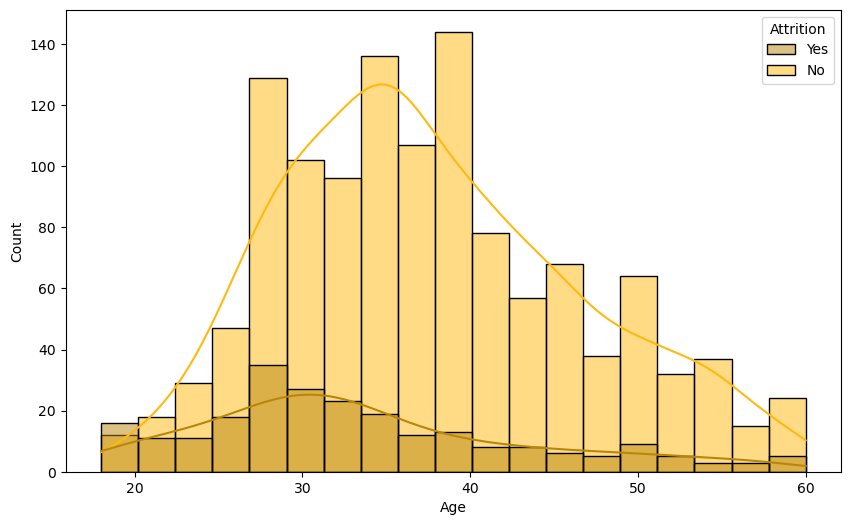

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(x="Age",hue="Attrition",data=df,kde=True,palette=["#B8860B","#FFB90F"])

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

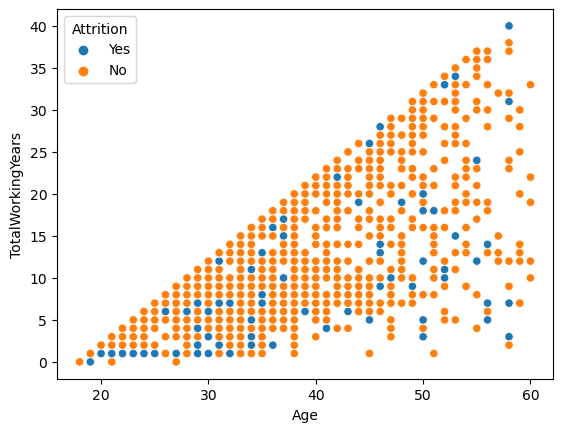

In [33]:
sns.scatterplot(data=df, x='Age', y='TotalWorkingYears', hue='Attrition')

# Company stocks for employees and its impact on attrition

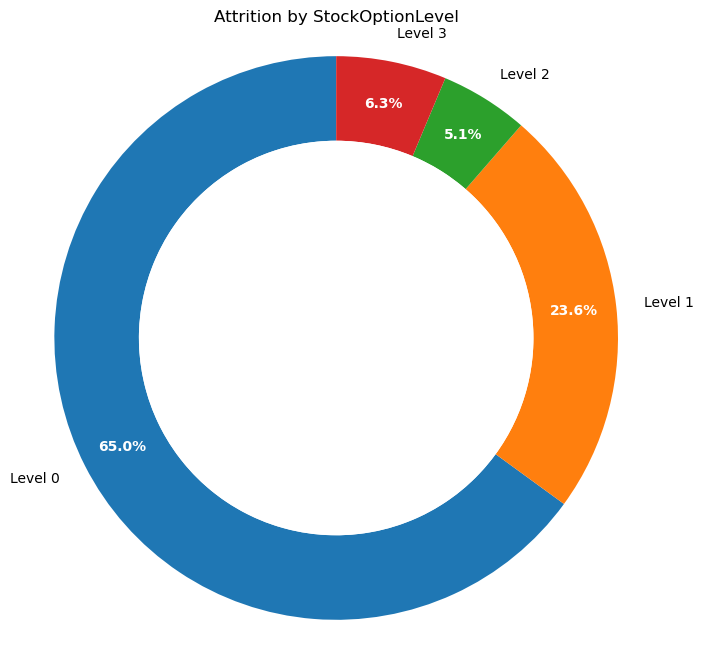

In [34]:
# Calculate the counts
edu_att_counts = df.groupby(['StockOptionLevel', 'Attrition']).size().unstack(fill_value=0)

# Map numerical values to labels
stock_option_labels = {
    0: 'Level 0',
    1: 'Level 1',
    2: 'Level 2',
    3: 'Level 3'
}
edu_att_counts.index = edu_att_counts.index.map(stock_option_labels)

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(edu_att_counts['Yes'], labels=edu_att_counts.index, autopct='%1.1f%%',
                                   pctdistance=0.85, startangle=90, wedgeprops=dict(width=0.3))
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.setp(texts, size=10)
ax.set_title("Attrition by StockOptionLevel")

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Show the plot
plt.show()

# Role of gender and age in the workplace

<Axes: xlabel='Age', ylabel='Gender'>

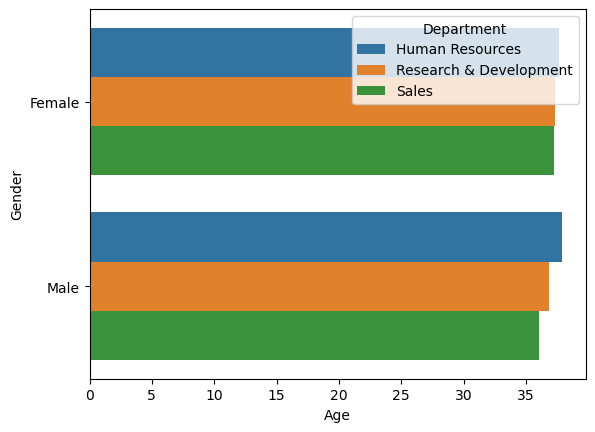

In [35]:
age_job_df = pd.DataFrame(df.groupby(['Gender' , 'Department'])['Age'].mean()).reset_index()
sns.barplot(age_job_df , x = 'Age' , y = 'Gender' , hue = 'Department')

# New hires and Attrition

In [36]:
new_hires= df[(df['YearsAtCompany'] < 1) & (df['Attrition'] == 'Yes')]

print(len(new_hires))

16


In [37]:
df.drop(['StandardHours'], axis=1, inplace=True)

# Statistical Analysis
1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

1. The Anova test is employed for the examination of how various numerical characteristics affect a categorical response attribute.
2. The Anova test furnishes two statistical metrics: the f_score and the p_value.
Keep in mind:
3. A higher F-score signifies a more robust connection between the independent variable(s) and the dependent variable.
4. Should the p-value fall below your designated significance threshold (e.g., p less than 0.05), we are able to reject the null hypothesis.

In [38]:
num_cols = df.select_dtypes(np.number).columns

In [39]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [40]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

#2. Visualizing the F_Score of ANOVA Test of Each Numerical features

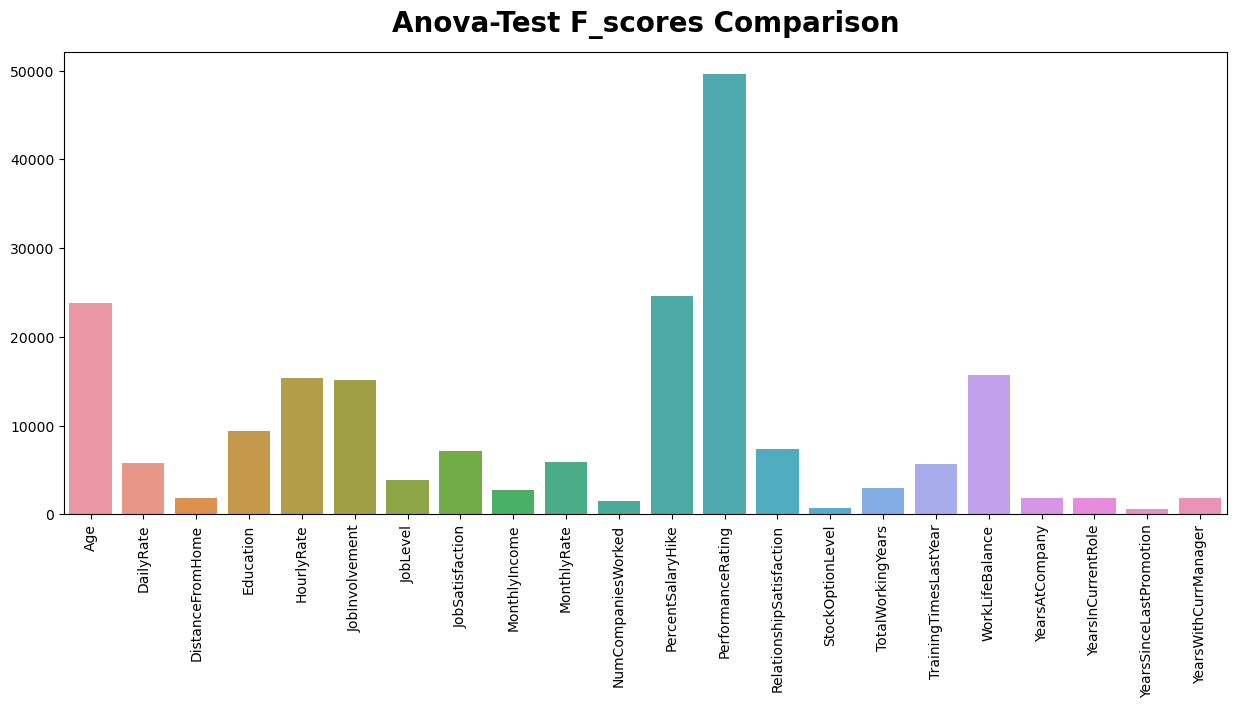

In [41]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

# for index,value in enumerate(values):
#     plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=10)
plt.show()

#3. Comparing F_Score and P_value of ANOVA Test.

In [42]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [43]:
test_df

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4                 HourlyRate  15362.122371  0.00000000000000000000
5             JobInvolvement  15116.579563  0.00000000000000000000
6                   JobLevel   3911.331585  0.00000000000000000000
7            JobSatisfaction   7168.703089  0.00000000000000000000
8              MonthlyIncome   2804.459632  0.00000000000000000000
9                MonthlyRate   5944.089071  0.00000000000000000000
10        NumCompaniesWorked   1478.188633  0.00000000000000000000
11         PercentSalaryHike  24602.507947  0.00000000000000000000
12         PerformanceRating  49579.088833  0.00000000000000000000
13  RelationshipSatisfaction   7334.250922  0.00000000000000000000
14          StockOptionLevel    683.069576  0.00000000000000000000
15         TotalWorkingYears   2994.906310  0.00000000000000000000
16     TrainingTimesLastYear   5691.401732  0.00000000000000000000
17           WorkLifeBalance  15663.161434  0.00000000000000000000
18            YearsAtCompany   1829.442766  0.00000000000000000000
19        YearsInCurrentRole   1834.262264  0.00000000000000000000
20   YearsSinceLastPromotion    573.896430  0.00000000000000000000
21      YearsWithCurrManager   1793.291314  0.00000000000000000000

Note:

A strong association with attrition is evident in the following features, as indicated by their high F-scores and very low p-values

1. Age
2. DailyRate
3. HourlyRate
4. MonthlyIncome
5. MonthlyRate
6. NumCompaniesWorked
7. PercentSalaryHike
8. TotalWorkingYears
9. TrainingTimesLastYear
10. YearsAtCompany
11. YearsWithCurrManager.

Conversely, the following features do not exhibit a significant relationship with attrition due to their moderate F-scores and extremely high p-values:

1. DistanceFromHome
2. StockOptionLevel
3. YearsInCurrentRole
4. YearsSinceLastPromotion.

It is imperative for the organization to prioritize the identified significant features when devising strategies to mitigate attrition rates.






# 4. Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [44]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [45]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

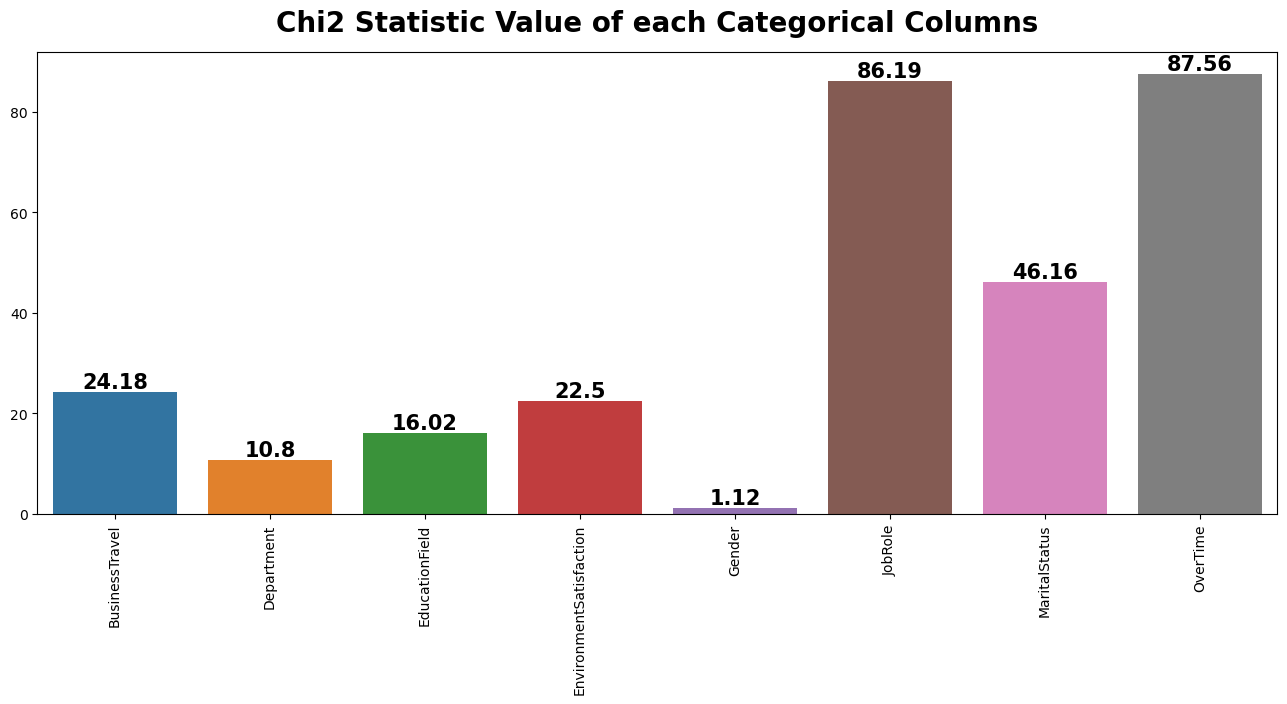

In [46]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

# 5. Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [47]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [48]:
test_df

Features  Chi_2 Statistic                 P_value
0           BusinessTravel        24.182414  0.00000560861447644993
1               Department        10.796007  0.00452560657447963286
2           EducationField        16.024674  0.00677398013902521211
3  EnvironmentSatisfaction        22.503881  0.00005123468906289433
4                   Gender         1.116967  0.29057244902890855265
5                  JobRole        86.190254  0.00000000000000275248
6            MaritalStatus        46.163677  0.00000000009455511060
7                 OverTime        87.564294  0.00000000000000000001

# Predicting Attrition Values

In [75]:
df1 = df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'Department', 'JobRole', 'JobSatisfaction', 
         'MaritalStatus', 'OverTime', 'WorkLifeBalance', 'Attrition']]

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Education                1470 non-null   int64 
 1   EnvironmentSatisfaction  1470 non-null   object
 2   JobInvolvement           1470 non-null   int64 
 3   JobLevel                 1470 non-null   int64 
 4   Department               1470 non-null   object
 5   JobRole                  1470 non-null   object
 6   JobSatisfaction          1470 non-null   int64 
 7   MaritalStatus            1470 non-null   object
 8   OverTime                 1470 non-null   object
 9   WorkLifeBalance          1470 non-null   int64 
 10  Attrition                1470 non-null   object
dtypes: int64(5), object(6)
memory usage: 126.5+ KB


In [77]:
df1.head()

Education EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0          2                  Medium               3         2   
1          1                    High               2         2   
2          2               Very High               2         1   
3          4               Very High               3         1   
4          1                     Low               3         1   

               Department                JobRole  JobSatisfaction  \
0                   Sales        Sales Executive                4   
1  Research & Development     Research Scientist                2   
2  Research & Development  Laboratory Technician                3   
3  Research & Development     Research Scientist                3   
4  Research & Development  Laboratory Technician                2   

  MaritalStatus OverTime  WorkLifeBalance Attrition  
0        Single      Yes                1       Yes  
1       Married       No                3        No  
2        Single      Yes                3       Yes  
3       Married      Yes                3        No  
4       Married       No                3        No

In [78]:
df1['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [79]:
df1['EnvironmentSatisfaction'] = df1['EnvironmentSatisfaction'].map({'Low':0, 'Medium':1, 'High':2, 'Very High':3})

In [80]:
df1['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [81]:
df1['Department'] = df1['Department'].map({'Sales':0, 'Research & Development':1, 'Human Resources':2})

In [82]:
df1['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [83]:
df1['JobRole'] = df1['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2, 
                                     'Manufacturing Director':3, 'Healthcare Representative':4, 
                                     'Manager':5, 'Sales Representative':6, 'Research Director':7, 
                                     'Human Resources':8})

In [84]:
df1['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [85]:
df1['MaritalStatus'] = df1['MaritalStatus'].map({'Single':0, 'Married':1, 'Divorced':2})

In [86]:
df1['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
df1['OverTime'] = df1['OverTime'].map({'Yes':1, 'No':0})

In [88]:
df1['Attrition'] = df1['Attrition'].map({'Yes':1, 'No':0})

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Education                1470 non-null   int64
 1   EnvironmentSatisfaction  1470 non-null   int64
 2   JobInvolvement           1470 non-null   int64
 3   JobLevel                 1470 non-null   int64
 4   Department               1470 non-null   int64
 5   JobRole                  1470 non-null   int64
 6   JobSatisfaction          1470 non-null   int64
 7   MaritalStatus            1470 non-null   int64
 8   OverTime                 1470 non-null   int64
 9   WorkLifeBalance          1470 non-null   int64
 10  Attrition                1470 non-null   int64
dtypes: int64(11)
memory usage: 126.5 KB


In [91]:
y = df1.pop('Attrition')
X = df1

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
!pip install xgboost

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [100]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
# model1.score(X_test, y_test)
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.8458049886621315

In [101]:
log_loss(y_test, y_pred)

5.557751542993121

# XG Boost

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [113]:
parameters = {
    'max_depth': range (2, 15, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.5, 0.1, 0.01, 0.05]
}

In [114]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [115]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 208 candidates, totalling 2080 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.05],
                         'max_depth': range(2, 15),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [116]:
model = grid_search.best_estimator_

In [117]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.8684807256235828

In [118]:
log_loss(y_test, y_pred)

4.74043513961178

# Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc=RandomForestClassifier()

In [133]:
param_grid = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [134]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 25, 50, 100, 200, 500]})

In [135]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

In [136]:
rfc1=RandomForestClassifier(criterion='gini',
 max_depth=8,
 max_features='sqrt',
 n_estimators=50)

In [137]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50)

In [138]:
pred=rfc1.predict(X_test)

In [139]:
accuracy_score(y_test,pred)

0.8571428571428571

In [141]:
log_loss(y_test, pred)

5.149093341302451

# SVM

In [142]:
from sklearn.svm import SVC

In [143]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.835 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.845 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.859 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.849 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [148]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [144]:
m = grid.best_estimator_

In [145]:
y_pred = m.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred)

0.8458049886621315

In [147]:
log_loss(y_test, y_pred)

5.557751542993121

# Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB

In [150]:
gnb = GaussianNB()

In [151]:
m = gnb.fit(X_train, y_train)

In [152]:
y_pred = m.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [154]:
log_loss(y_test, y_pred)

5.149093341302451

# Neural network

In [193]:
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential, load_model
from keras.layers import Dense

In [194]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1408      
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,min_lr=0.001,factor=0.1)
model_checkpoint = ModelCheckpoint('checkpoint/',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=90)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, callbacks=[reduce_lr, model_checkpoint, early_stopping])

Epoch 1/200
 1/21 [>.............................] - ETA: 2s - loss: 0.6486 - accuracy: 0.8000
Epoch 1: val_accuracy improved from -inf to 0.83673, saving model to checkpoint/
INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 1s 19ms/step - loss: 0.5394 - accuracy: 0.8397 - val_loss: 0.4585 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 2/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3757 - accuracy: 0.9200
Epoch 2: val_accuracy did not improve from 0.83673
21/21 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8397 - val_loss: 0.4145 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 3/200
 1/21 [>.............................] - ETA: 0s - loss: 0.4877 - accuracy: 0.8000
Epoch 3: val_accuracy did not improve from 0.83673
21/21 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8397 - val_loss: 0.4009 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 4/200
 1/21 [>.............................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8400
Epoch 4: val_accuracy did not improve from 0.83673
21/21 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8397 - val_loss: 0.3898 - val_accuracy: 0.8367 - lr: 

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 7ms/step - loss: 0.3770 - accuracy: 0.8397 - val_loss: 0.3748 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 7/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8800
Epoch 7: val_accuracy did not improve from 0.84127
21/21 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8513 - val_loss: 0.3708 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 8/200
 1/21 [>.............................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8200
Epoch 8: val_accuracy did not improve from 0.84127
21/21 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8513 - val_loss: 0.3685 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 9/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2551 - accuracy: 0.9000
Epoch 9: val_accuracy did not improve from 0.84127
21/21 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8503 - val_loss: 0.3660 - val_accuracy: 0.8413 - lr: 0

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 7ms/step - loss: 0.3436 - accuracy: 0.8610 - val_loss: 0.3573 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 34/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8600
Epoch 34: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8610 - val_loss: 0.3558 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 35/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3092 - accuracy: 0.9000
Epoch 35: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8571 - val_loss: 0.3551 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 36/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3387 - accuracy: 0.9000
Epoch 36: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8591 - val_loss: 0.3551 - val_accuracy: 0.8322 -

Epoch 62/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2213 - accuracy: 0.9400
Epoch 62: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8649 - val_loss: 0.3528 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 63/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8600
Epoch 63: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8620 - val_loss: 0.3525 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 64/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9400
Epoch 64: val_accuracy did not improve from 0.84354
21/21 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8659 - val_loss: 0.3521 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 65/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8800
Epoch 65: val_accuracy did not imp

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 7ms/step - loss: 0.3277 - accuracy: 0.8659 - val_loss: 0.3512 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 70/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8600
Epoch 70: val_accuracy did not improve from 0.84580
21/21 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8678 - val_loss: 0.3510 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 71/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8800
Epoch 71: val_accuracy did not improve from 0.84580
21/21 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8678 - val_loss: 0.3516 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 72/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8600
Epoch 72: val_accuracy did not improve from 0.84580
21/21 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8669 - val_loss: 0.3510 - val_accuracy: 0.8390 -

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.8678 - val_loss: 0.3522 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 81/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8600
Epoch 81: val_accuracy did not improve from 0.84807
21/21 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8688 - val_loss: 0.3503 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 82/200
 1/21 [>.............................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9200
Epoch 82: val_accuracy did not improve from 0.84807
21/21 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8698 - val_loss: 0.3515 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 83/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3207 - accuracy: 0.9000
Epoch 83: val_accuracy did not improve from 0.84807
21/21 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8698 - val_loss: 0.3499 - val_accuracy: 0.8458 -

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 6ms/step - loss: 0.3170 - accuracy: 0.8737 - val_loss: 0.3503 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 92/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2169 - accuracy: 0.9400
Epoch 92: val_accuracy did not improve from 0.85034
21/21 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8717 - val_loss: 0.3513 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 93/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2594 - accuracy: 0.8800
Epoch 93: val_accuracy did not improve from 0.85034
21/21 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8746 - val_loss: 0.3511 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 94/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3339 - accuracy: 0.8800
Epoch 94: val_accuracy did not improve from 0.85034
21/21 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8698 - val_loss: 0.3501 - val_accuracy: 0.8503 -

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 7ms/step - loss: 0.3100 - accuracy: 0.8737 - val_loss: 0.3510 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 103/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3219 - accuracy: 0.9000
Epoch 103: val_accuracy did not improve from 0.85261
21/21 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8688 - val_loss: 0.3510 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 104/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8600
Epoch 104: val_accuracy did not improve from 0.85261
21/21 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8698 - val_loss: 0.3511 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 105/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8600
Epoch 105: val_accuracy did not improve from 0.85261
21/21 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8776 - val_loss: 0.3522 - val_accuracy: 0.

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 1s 34ms/step - loss: 0.3098 - accuracy: 0.8727 - val_loss: 0.3511 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 107/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8400
Epoch 107: val_accuracy did not improve from 0.85488
21/21 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8698 - val_loss: 0.3506 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 108/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3084 - accuracy: 0.9200
Epoch 108: val_accuracy did not improve from 0.85488
21/21 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8707 - val_loss: 0.3518 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 109/200
 1/21 [>.............................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9400
Epoch 109: val_accuracy did not improve from 0.85488
21/21 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8727 - val_loss: 0.3518 - val_accuracy: 0

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 6ms/step - loss: 0.3049 - accuracy: 0.8698 - val_loss: 0.3521 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 114/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8600
Epoch 114: val_accuracy did not improve from 0.86168
21/21 [==============================] - 0s 991us/step - loss: 0.3056 - accuracy: 0.8688 - val_loss: 0.3512 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 115/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2671 - accuracy: 0.9000
Epoch 115: val_accuracy did not improve from 0.86168
21/21 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8727 - val_loss: 0.3522 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 116/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2851 - accuracy: 0.9000
Epoch 116: val_accuracy did not improve from 0.86168
21/21 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8698 - val_loss: 0.3525 - val_accuracy: 

INFO:tensorflow:Assets written to: checkpoint/assets


21/21 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 0.8717 - val_loss: 0.3527 - val_accuracy: 0.8639 - lr: 0.0010
Epoch 119/200
 1/21 [>.............................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8200
Epoch 119: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8737 - val_loss: 0.3510 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 120/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2222 - accuracy: 0.8800
Epoch 120: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8727 - val_loss: 0.3527 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 121/200
 1/21 [>.............................] - ETA: 0s - loss: 0.1640 - accuracy: 0.9600
Epoch 121: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8746 - val_loss: 0.3516 - val_accuracy: 0.

Epoch 147/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8400
Epoch 147: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8795 - val_loss: 0.3540 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 148/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3084 - accuracy: 0.9000
Epoch 148: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 997us/step - loss: 0.2919 - accuracy: 0.8785 - val_loss: 0.3535 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 149/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8400
Epoch 149: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8766 - val_loss: 0.3538 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 150/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8600
Epoch 150: val_accuracy d

 1/21 [>.............................] - ETA: 0s - loss: 0.2631 - accuracy: 0.8800
Epoch 175: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.8844 - val_loss: 0.3562 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 176/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8800
Epoch 176: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8814 - val_loss: 0.3569 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 177/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8000
Epoch 177: val_accuracy did not improve from 0.86395
21/21 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8785 - val_loss: 0.3549 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 178/200
 1/21 [>.............................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8400
Epoch 178: val_accuracy did not improve f

[]

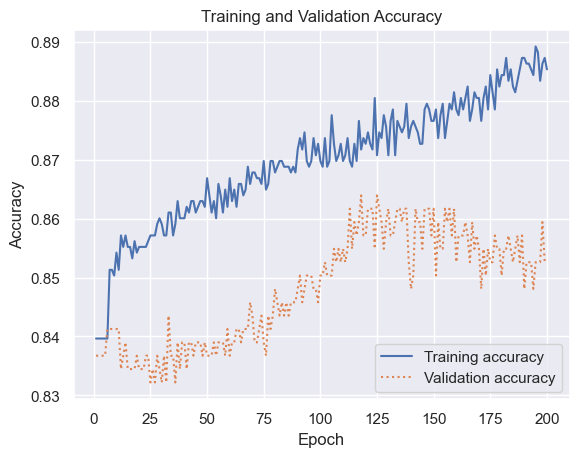

In [197]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [199]:
model.save('best_model.h5')

In [200]:
model = load_model('best_model.h5')
pred = model.predict(X_test)

14/14 [==============================] - 0s 389us/step


In [205]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Loss:",loss)
print("Test Accuracy:",acc)

14/14 [==============================] - 0s 497us/step - loss: 0.3585 - accuracy: 0.8526
Test Loss: 0.3585078716278076
Test Accuracy: 0.8526077270507812
